# Audiobooks business case

To predict which customers are likely to convert again - return to purchase

### Extract the data from the csv

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn import preprocessing

## using numpy array 
raw_csv_data = np.loadtxt('Audiobooks_data.csv',delimiter=',')
## using pandas for visual purposes
data = pd.read_csv('Audiobooks_data_with_headings.csv')

In [2]:
unscaled_inputs_all = raw_csv_data[:,1:-1]

data.iloc[:,1:-1]

,Book length (mins) avg,book length (mins) overall,price_avg,price_overall,review,review 10/10,completion,mins listened,support requests,last visited minus purchase date
0,2160.0,2160,10.13,10.13,0,8.91,0.00,0.0,0,0
1,1404.0,2808,6.66,13.33,1,6.50,0.00,0.0,0,182
2,324.0,324,10.13,10.13,1,9.00,0.00,0.0,1,334
3,1620.0,1620,15.31,15.31,0,9.00,0.00,0.0,0,183
4,432.0,1296,7.11,21.33,1,9.00,0.00,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
14079,2160.0,2160,7.99,7.99,0,8.91,0.00,0.0,0,54
14080,1620.0,1620,5.33,5.33,1,9.00,0.61,0.0,0,4
14081,1080.0,1080,6.55,6.55,1,6.00,0.29,0.0,0,29
14082,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0


In [3]:
## separated target data from input data
targets_all = raw_csv_data[:,-1]

data.iloc[:,-1]

0        1
1        1
2        1
3        1
4        1
        ..
14079    0
14080    0
14081    0
14082    0
14083    0
Name: targets, Length: 14084, dtype: int64

In [4]:
targets_all.shape

(14084,)

### Balance the dataset

In [5]:
# Count how many targets are 1 
num_one_targets = int(np.sum(targets_all))

# Set a counter for targets that are 0 (meaning that the customer did not convert)
zero_targets_counter = 0

indices_to_remove = []

# count number of 0 targets and match to 1s if there are more append to indices_to_remove
for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
# We delete all indices that we marked "to remove" in the loop above
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)

### Standardize the inputs

In [6]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

In [7]:
## showing corresponding headings for NP array
data.iloc[0:0,1:-1]

,Book length (mins) avg,book length (mins) overall,price_avg,price_overall,review,review 10/10,completion,mins listened,support requests,last visited minus purchase date


In [8]:
pd.DataFrame(scaled_inputs).head()

,0,1,2,3,4,5,6,7,8,9
0,1.189565,0.363988,0.677289,0.265952,-0.448772,-0.011256,-0.374752,-0.863506,-0.205366,-0.772409
1,-0.330228,1.108438,-0.088414,0.771269,2.228303,-3.493669,-0.374752,-0.863506,-0.205366,1.164998
2,-2.501360,-1.745287,0.677289,0.265952,2.228303,0.118793,-0.374752,-0.863506,2.231791,2.783052
3,0.103999,-0.256387,1.820326,1.083935,-0.448772,0.118793,-0.374752,-0.863506,-0.205366,1.175643
4,-2.284247,-0.628612,0.010885,2.034564,2.228303,0.118793,-0.374752,-0.863506,-0.205366,-0.772409


In [9]:
scaled_inputs.shape[0]

4474

### Shuffle the data

In [10]:
# Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

### Split the dataset into train, validation, and test

In [11]:
samples_count = shuffled_inputs.shape[0]

# 80-10-10 distribution of training, validation, and test.
# integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

#check the balance of targets - % of 1 values
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

1774.0 3579 0.4956691813355686
223.0 447 0.4988814317673378
240.0 448 0.5357142857142857


### Save the three datasets in *.npz

In [12]:
np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)

In [13]:
#npz used as a temporary variable at each step
npz = np.load('Audiobooks_data_train.npz')

# to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(np.float)
# targets must be int because of sparse_categorical_crossentropy
train_targets = npz['targets'].astype(np.int)

npz = np.load('Audiobooks_data_validation.npz')

validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('Audiobooks_data_test.npz')
# we create test targets
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

### Build the model

In [14]:
input_size = 10
output_size = 2

#DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'), 
    tf.keras.layers.Dense(50, activation='relu'), 
    tf.keras.layers.Dense(50, activation='relu'), 
    tf.keras.layers.Dense(output_size, activation='softmax') 
])

### Choose the optimizer and the loss function

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 100

max_epochs = 100

# early stopping mechanism
# patience used, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

model.fit(train_inputs, 
          train_targets, 
          batch_size=batch_size, 
          epochs=max_epochs, 
          # callbacks are functions called by a task when a task is completed
          callbacks=[early_stopping], 
          validation_data=(validation_inputs, validation_targets), 
          verbose = 2 
          )  

Train on 3579 samples, validate on 447 samples
Epoch 1/100
3579/3579 - 1s - loss: 0.5054 - accuracy: 0.7972 - val_loss: 0.3610 - val_accuracy: 0.8702
Epoch 2/100
3579/3579 - 0s - loss: 0.3343 - accuracy: 0.8748 - val_loss: 0.3031 - val_accuracy: 0.8971
Epoch 3/100
3579/3579 - 0s - loss: 0.3009 - accuracy: 0.8905 - val_loss: 0.2833 - val_accuracy: 0.9016
Epoch 4/100
3579/3579 - 0s - loss: 0.2835 - accuracy: 0.8961 - val_loss: 0.2744 - val_accuracy: 0.9128
Epoch 5/100
3579/3579 - 0s - loss: 0.2722 - accuracy: 0.8994 - val_loss: 0.2658 - val_accuracy: 0.9105
Epoch 6/100
3579/3579 - 0s - loss: 0.2638 - accuracy: 0.8994 - val_loss: 0.2616 - val_accuracy: 0.9060
Epoch 7/100
3579/3579 - 0s - loss: 0.2564 - accuracy: 0.9005 - val_loss: 0.2632 - val_accuracy: 0.9038
Epoch 8/100
3579/3579 - 0s - loss: 0.2535 - accuracy: 0.9056 - val_loss: 0.2619 - val_accuracy: 0.9128
Epoch 9/100
3579/3579 - 0s - loss: 0.2482 - accuracy: 0.9033 - val_loss: 0.2587 - val_accuracy: 0.9060
Epoch 10/100
3579/3579 - 0

### Test accuracy

In [15]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets, verbose=2)

448/1 - 0s - loss: 0.2320 - accuracy: 0.9196


In [16]:
new_proba = model.predict_proba(test_inputs)[:,1]

In [17]:
pd.DataFrame(new_proba)
proba = new_proba.round()

In [18]:
len(proba)

448

In [19]:
len(test_targets)

448

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [21]:
## simple confusion matrix
sklearn.metrics.confusion_matrix(proba, test_targets)

array([[184,  12],
       [ 24, 228]], dtype=int64)

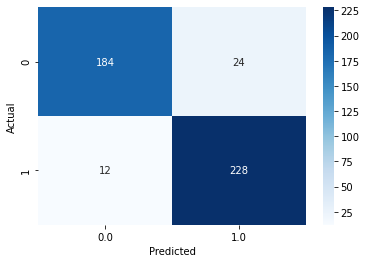

In [22]:
## confusion matrix using seaborn heatmap
data = {'y_Actual': test_targets,
       'y_Predicted': proba
       }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,cmap='Blues', fmt='g')

plt.show()